In [249]:
from krisj import gcn
import cameo
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [221]:
model = cameo.load_model("iJO1366")
reactions = list(model.reactions)

In [224]:
model.reactions.get_by_id("PGI")

{}

In [133]:
reactions = list(model.reactions)
couplings = gcn.calculate_flux_coupling(model)
couplings = np.abs(couplings) + 0.05
couplings = 1 / couplings

#couplings = 1 - np.abs(couplings) + 0.1
#couplings = 

In [154]:
ns = gcn.nullspace(model.S)
ns = ns / ns.sum(0)

In [256]:
reduced_ns = PCA(100).fit_transform(ns)

In [288]:
cos_mat.shape

(1242676,)

In [310]:
tsne = TSNE(2, metric="euclidean", perplexity=140)
cos_mat = distance.squareform(distance.pdist(ns, metric="cosine"))
dis_mat = 1 - np.abs(cos_mat)
coords = tsne.fit_transform(ns)

In [164]:
from scipy.spatial import distance

In [165]:
distance.pdist?

In [151]:
coords.shape

(95, 2)

In [197]:
mds = MDS(2, dissimilarity="precomputed", n_init=1)
tsne = TSNE(2, metric="precomputed", n_iter=100000)

(1242676,)

In [260]:
dis = distance.squareform(distance.pdist(ns, metric="euclidean"))
coords = mds.fit_transform(np.abs(dis))
print(mds.stress_)

50314664.3336


In [207]:
len(reactions)

1577

In [204]:
dis.shape

(1577, 1577)

In [129]:
coords = tsne.fit_transform(couplings)
print(tsne.kl_divergence_)

1.703479528427124


In [130]:
ignore_mets = ["h_c", "h2o_c", "h_e", "atp_c", "adp_c", "nad_c", "nadh_c", "pi_c", "coa_c", "co2_c", "nadph_c", "nadp_c"]
ignore_mets = set([model.metabolites.get_by_id(m) for m in ignore_mets])

edges = []
for i, reac_1 in enumerate(reactions):
    for reac_2 in reactions[i+1:]:
        if set(reac_1.metabolites) & set(reac_2.metabolites) - ignore_mets:
            edges.append((i, reactions.index(reac_2)))

In [173]:
from bokeh.plotting import figure, show, output_notebook
from bokeh import palettes

In [298]:
rand = np.random.multivariate_normal(np.zeros(500), np.diag(np.ones(500)), size=1500)
rand = rand / rand.mean(0)

In [299]:
rand.shape

(1500, 500)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [189]:
def nums_to_col(x, palette):
    x = x - x.min()
    x = x / x.max()*0.99
    x = x * len(palette)
    x = np.floor(x).astype("int")
    return [palette[n] for n in x]

In [219]:
pgi = model.reactions.get_by_id("PGI")

In [274]:
from krisj.plotting import color_range

In [275]:
color_range(40)

['#ff0000',
 '#ff2600',
 '#ff4c00',
 '#ff7200',
 '#ff9900',
 '#ffbf00',
 '#ffe500',
 '#f2ff00',
 '#cbff00',
 '#a5ff00',
 '#7fff00',
 '#59ff00',
 '#32ff00',
 '#0cff00',
 '#00ff19',
 '#00ff3f',
 '#00ff66',
 '#00ff8c',
 '#00ffb2',
 '#00ffd8',
 '#00feff',
 '#00d8ff',
 '#00b2ff',
 '#008cff',
 '#0065ff',
 '#003fff',
 '#0019ff',
 '#0c00ff',
 '#3300ff',
 '#5900ff',
 '#7f00ff',
 '#a500ff',
 '#cb00ff',
 '#f200ff',
 '#ff00e5',
 '#ff00bf',
 '#ff0098',
 '#ff0072',
 '#ff004c',
 '#ff0026']

In [280]:
color_dict = dict(zip(set(r.subsystem for r in model.reactions), color_range(40)))

In [307]:
tsne = TSNE(2, metric="euclidean", perplexity=140)
coords = tsne.fit_transform(rand)

In [311]:
fig = figure()
#colors = nums_to_col(coords[:, 2], palettes.RdBu11)
colors = [color_dict[r.subsystem] for r in model.reactions]
fig.scatter(coords[:, 0], coords[:, 1])#, color=colors)
#fig.text(coords[:, 0], coords[:, 1], text=[r.id for r in reactions])
show(fig)

In [244]:
distance.pdist([
    ns[reactions.index(model.reactions.FECRMabcpp)],
    ns[reactions.index(model.reactions.APRAUR)]
], metric="correlation")

array([ 0.17588284])

In [237]:
ns[reactions.index(model.reactions.GALTptspp)]

array([  1.44686626e-02,   1.48224170e-02,  -5.53681203e-04,
         2.93835247e-02,  -4.33710555e-02,   5.89732020e-02,
         6.08496109e-02,   1.38166803e-02,   5.56853360e-01,
         5.82021148e-03,  -1.28104030e-03,  -5.52692987e-02,
        -1.95265425e-02,   8.75244983e-02,   1.17087778e-02,
         5.23465423e-02,   1.78749035e-03,  -1.20229826e-02,
        -2.29894306e-01,  -1.32635155e-02,  -2.50934099e-03,
         8.03970213e-02,   7.48853291e-03,   1.70082316e-02,
         4.73504737e-02,  -1.84074948e-02,   2.51158202e-02,
         9.39116634e-02,  -3.54706526e-03,   1.75839933e-02,
         1.14032808e-02,   1.12928325e-02,  -1.42389037e-02,
        -2.43827958e-02,   5.17055593e-03,   1.84753090e-02,
        -4.47605186e-02,  -1.39748373e-01,   3.29301232e-02,
         1.84728787e-02,   2.22754828e-03,  -1.27890044e-01,
        -4.85857548e-03,   7.28323307e-03,   1.49848832e-02,
         6.08022414e-02,   4.01422231e-02,   1.18994990e-02,
        -1.61495582e-01,

In [233]:
model.reactions.AGPAT161

<Reaction AGPAT161 at 0x121bc67b8>

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


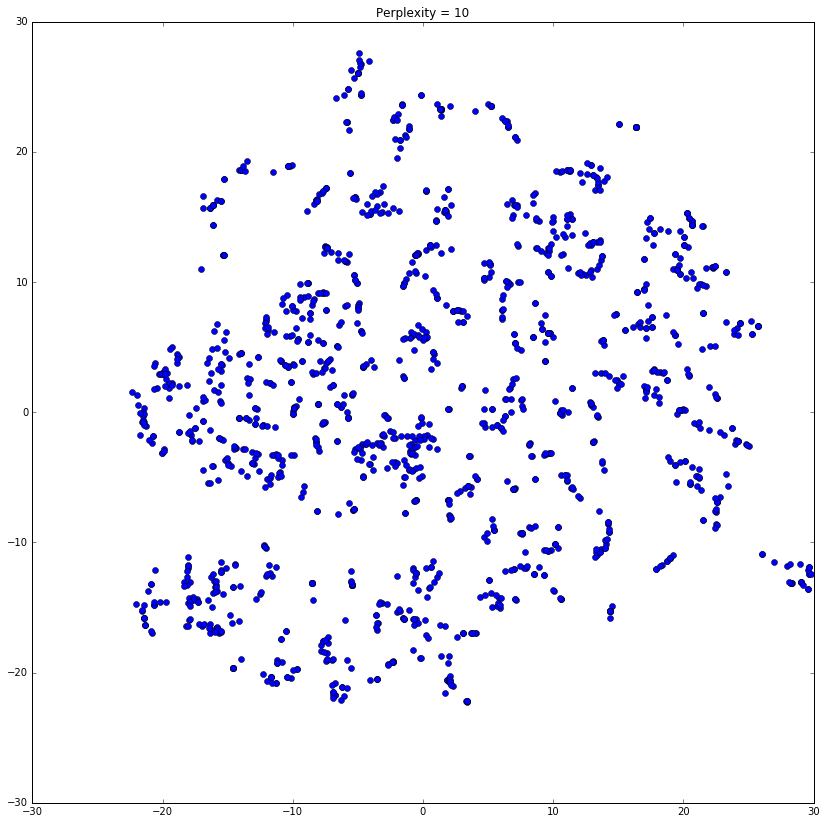

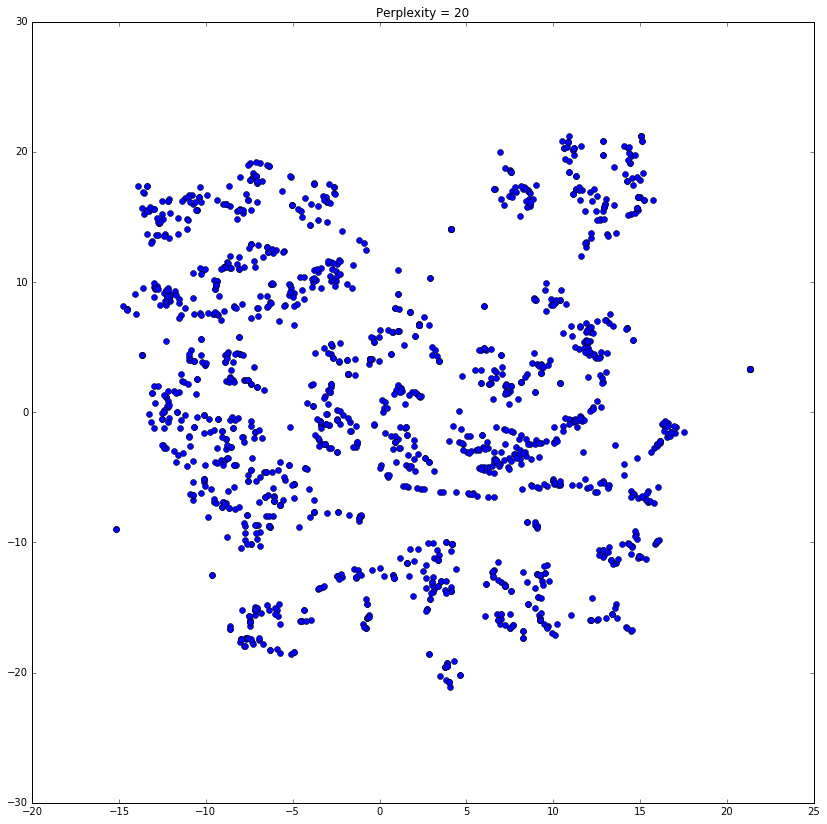

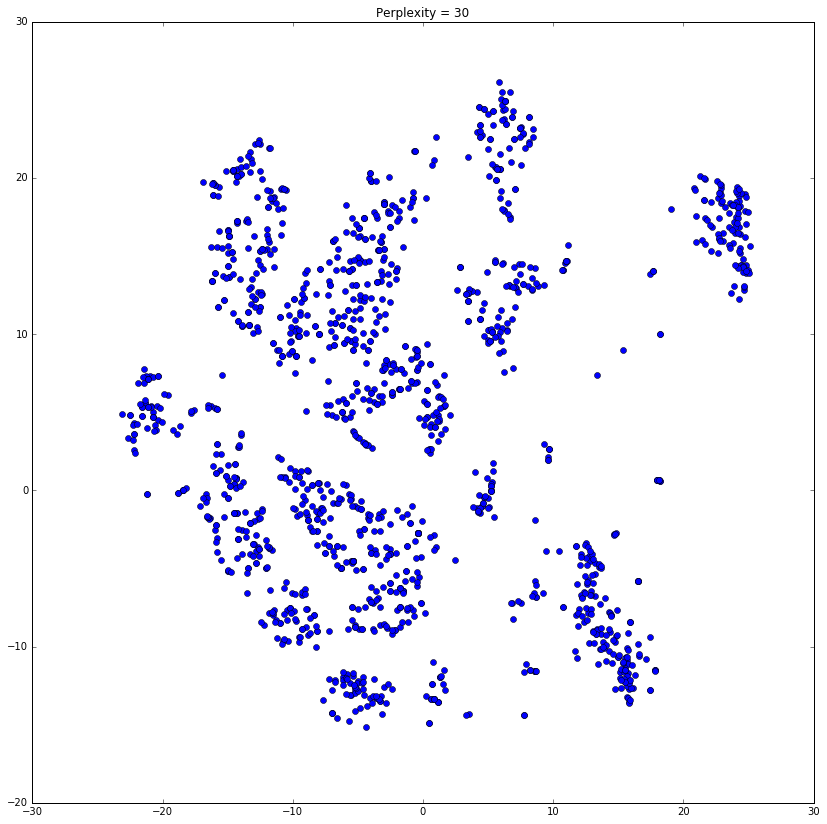

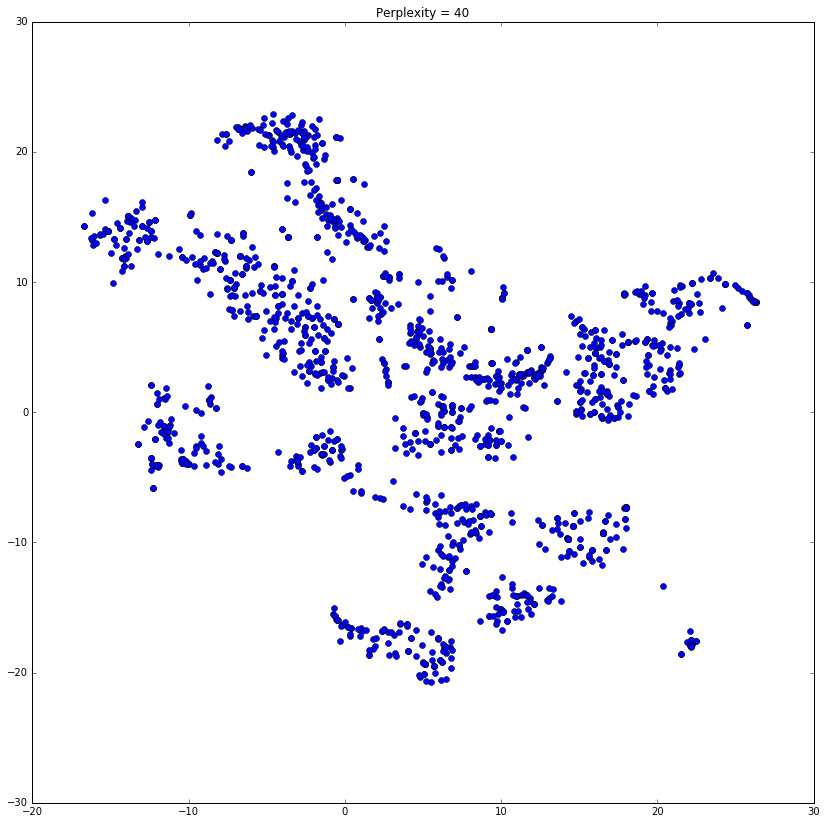

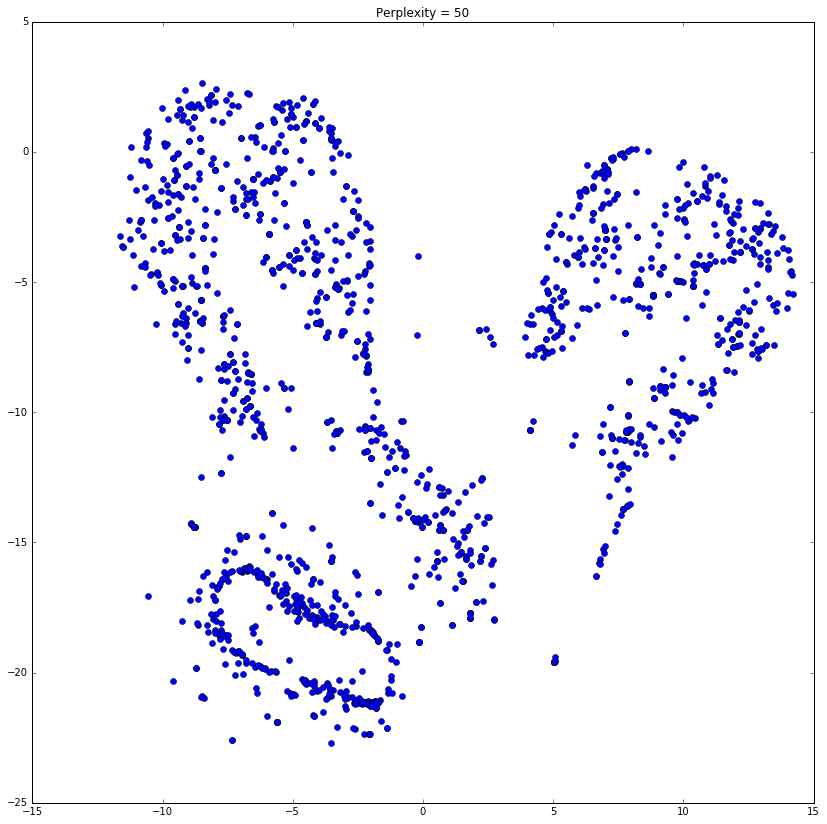

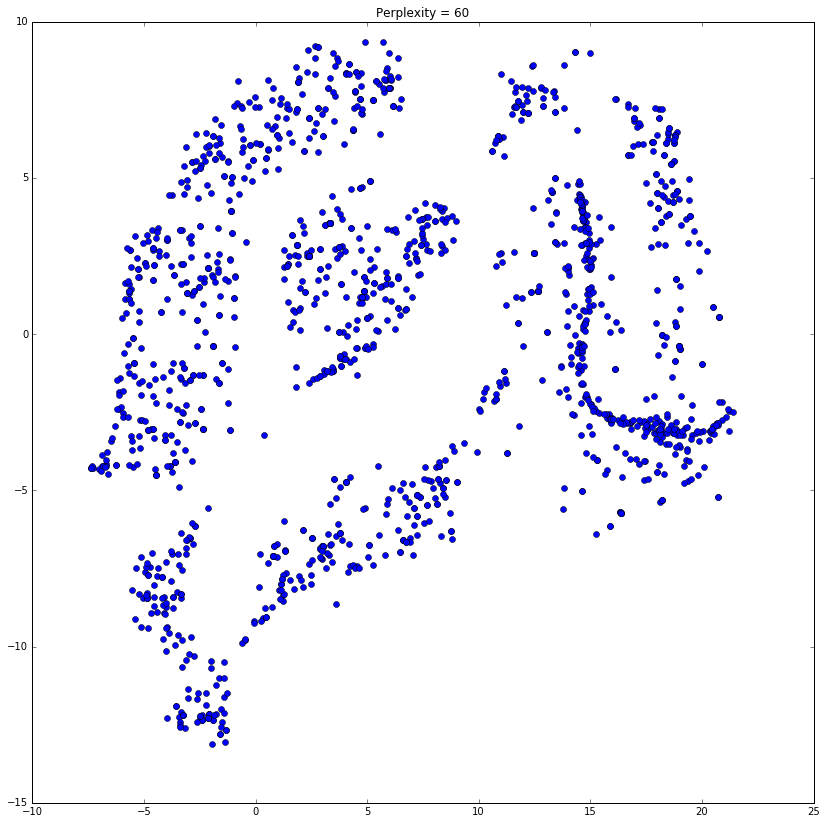

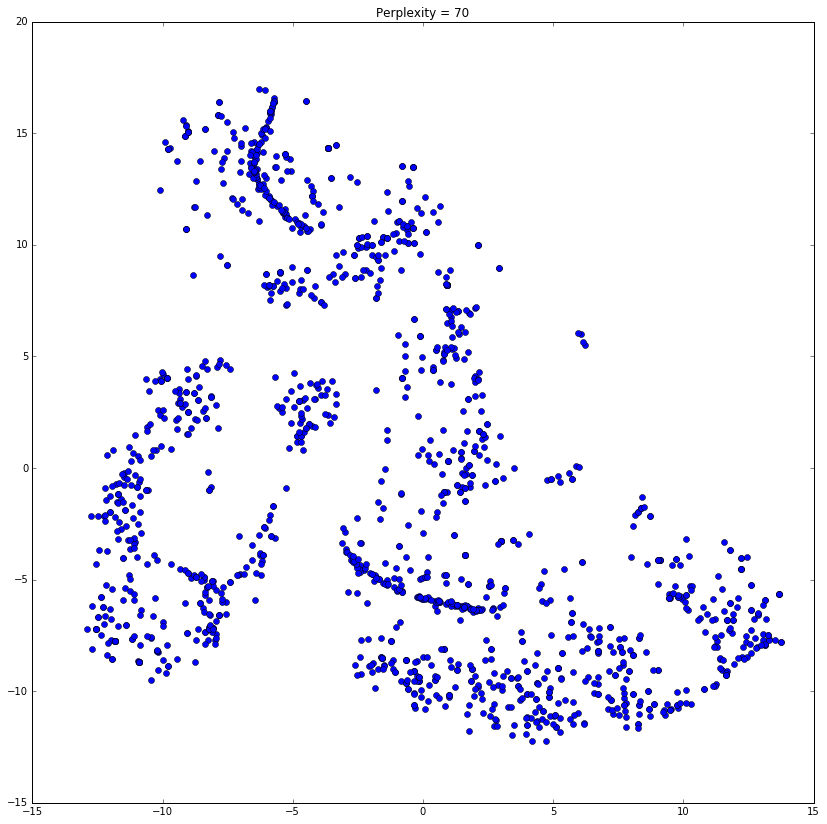

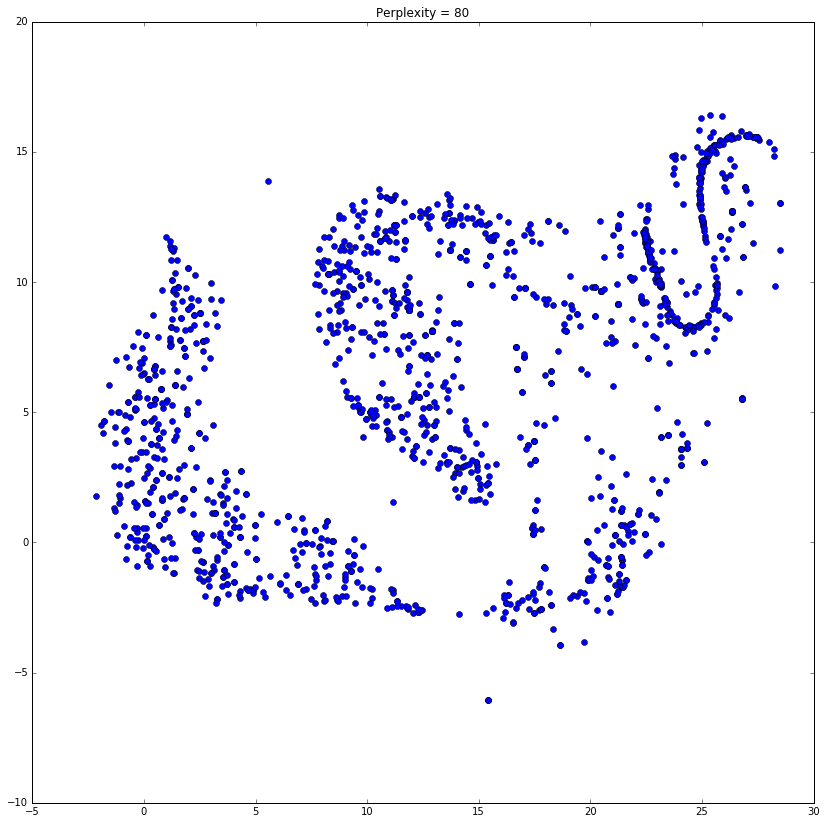

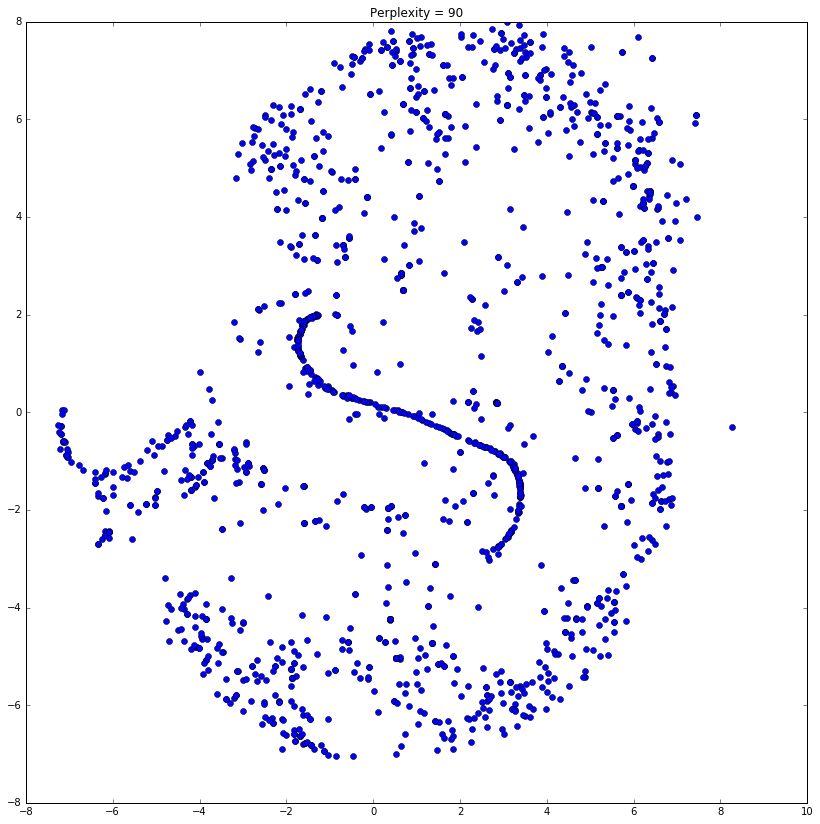

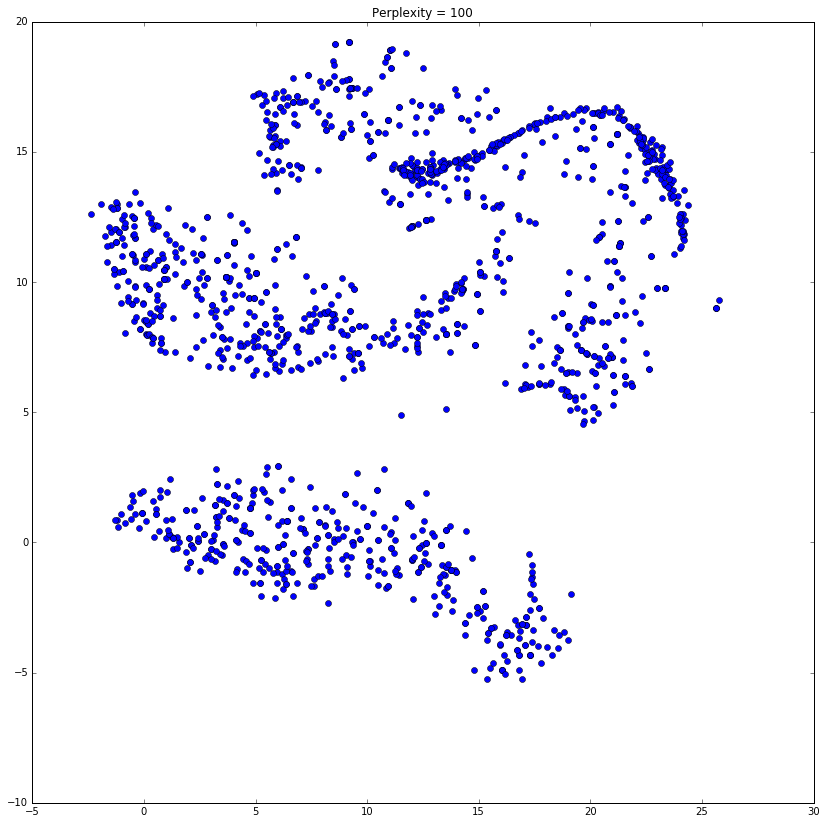

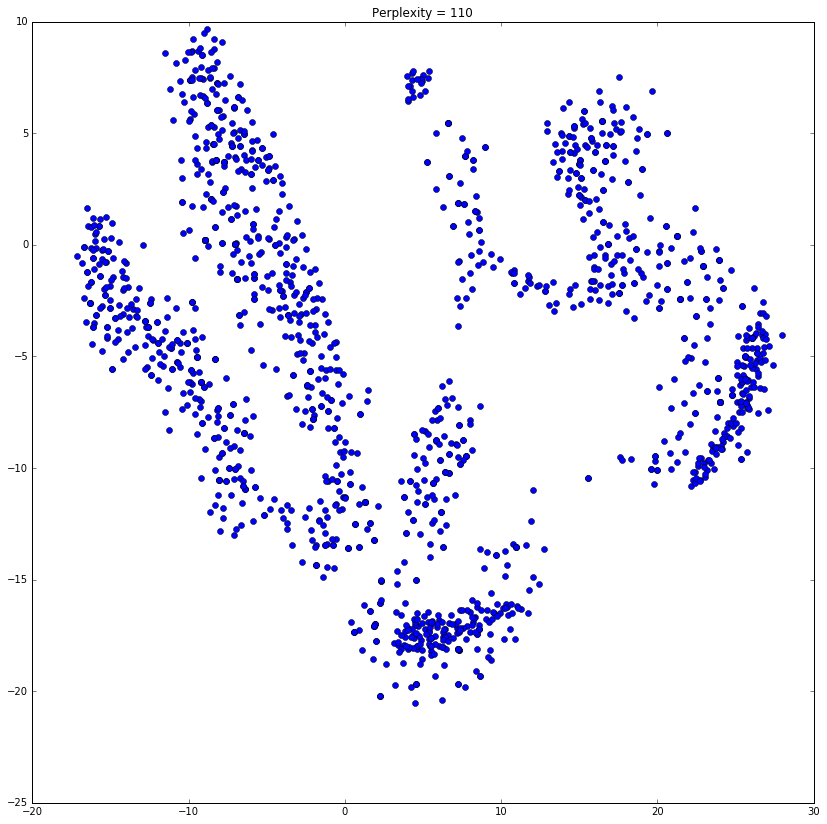

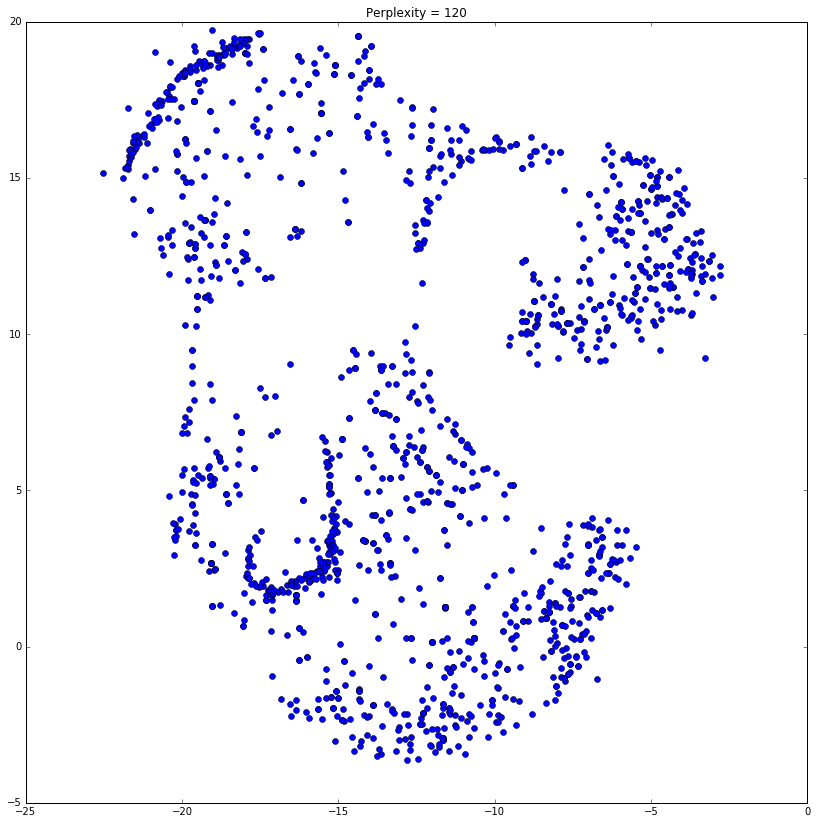

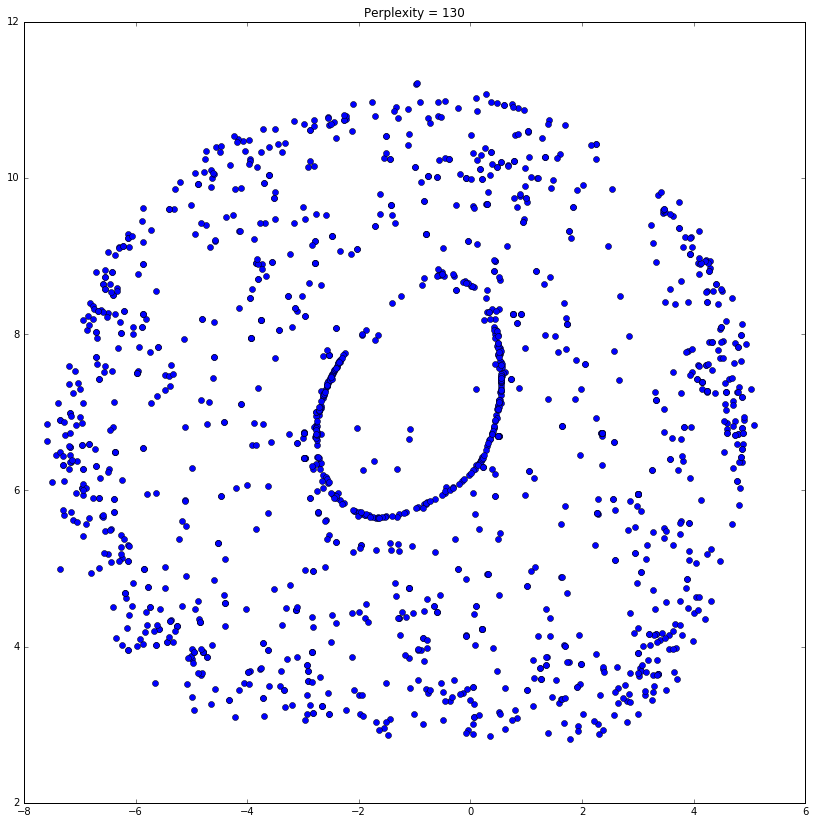

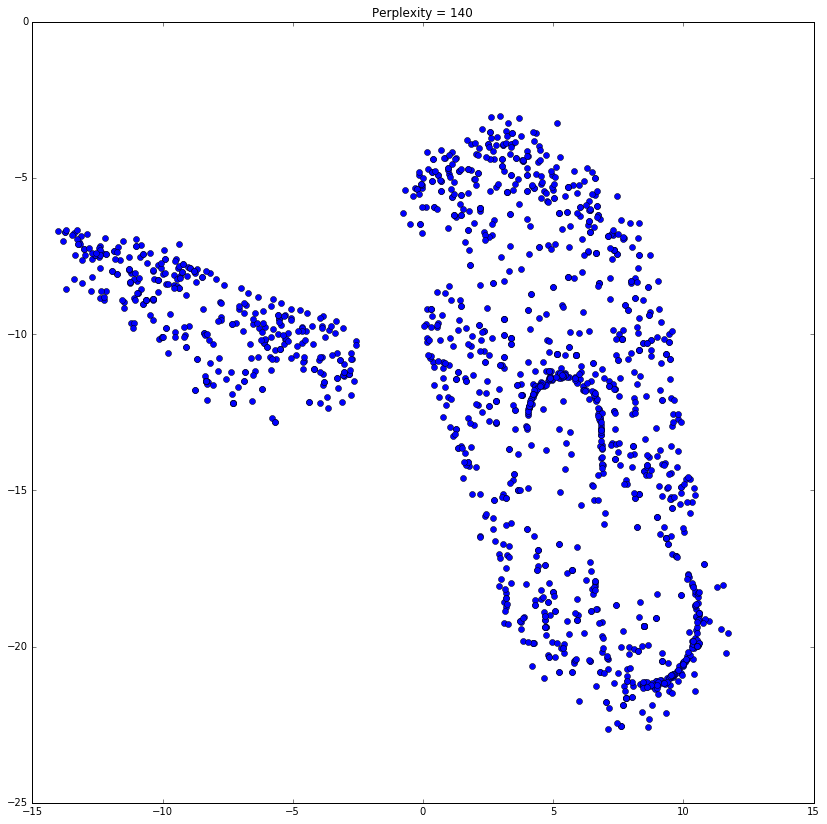

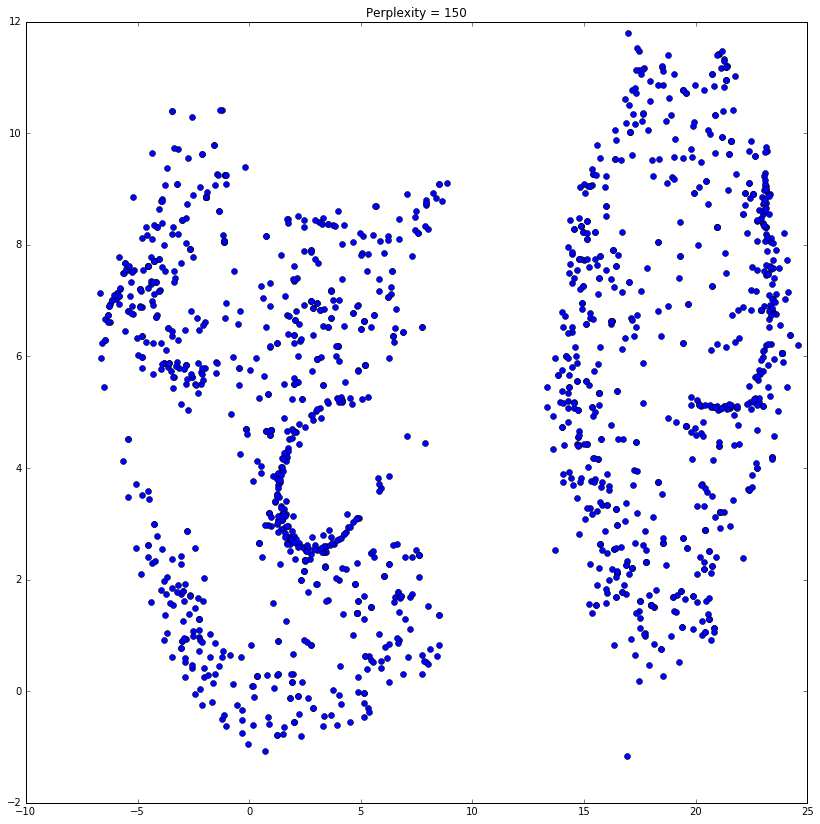

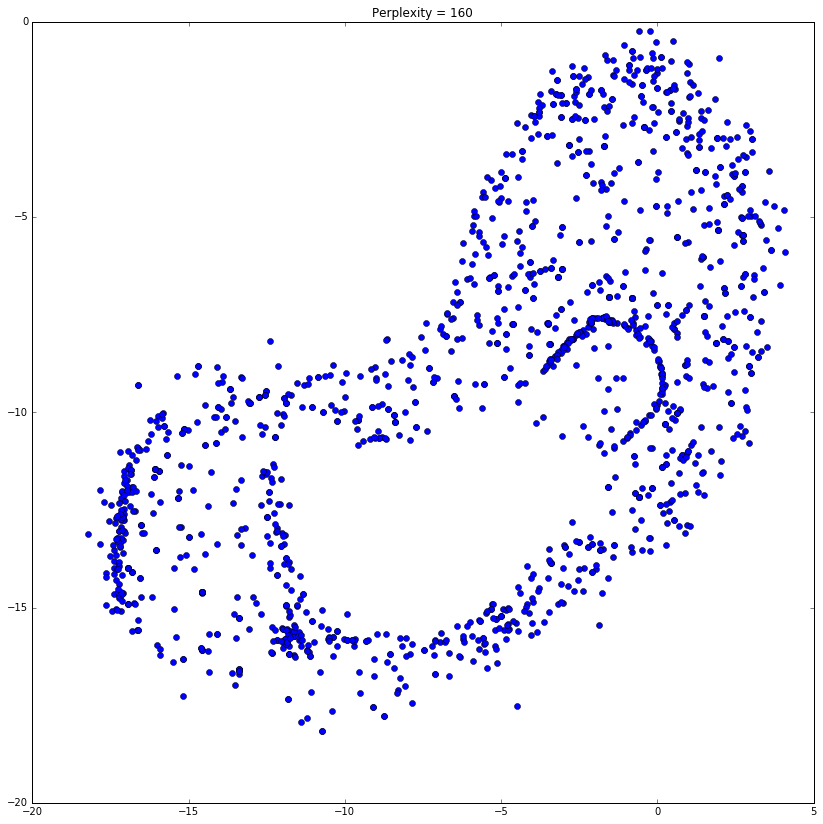

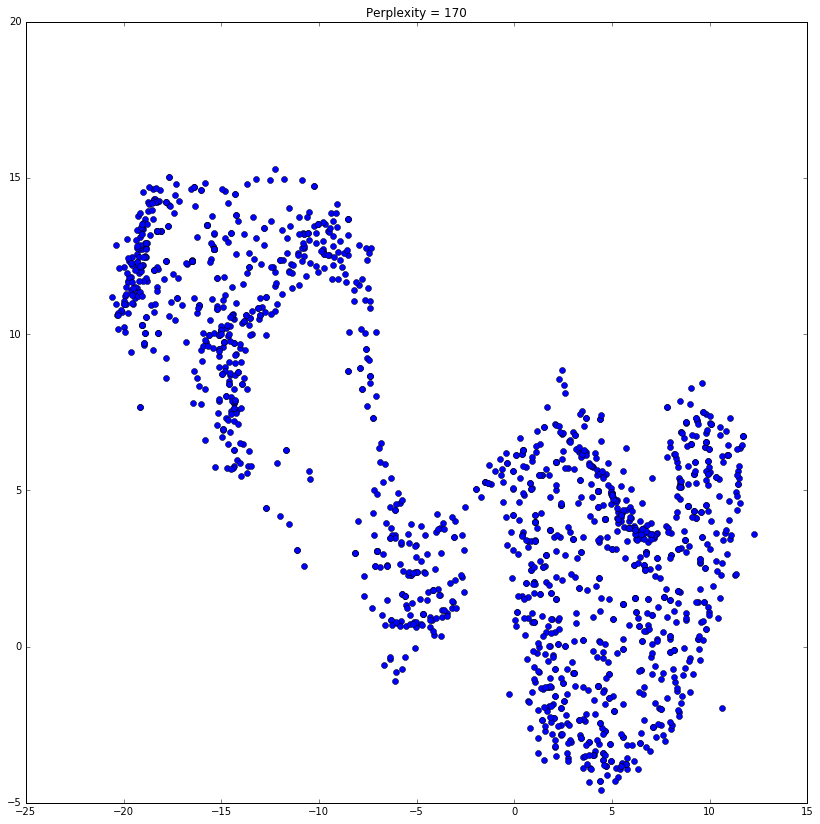

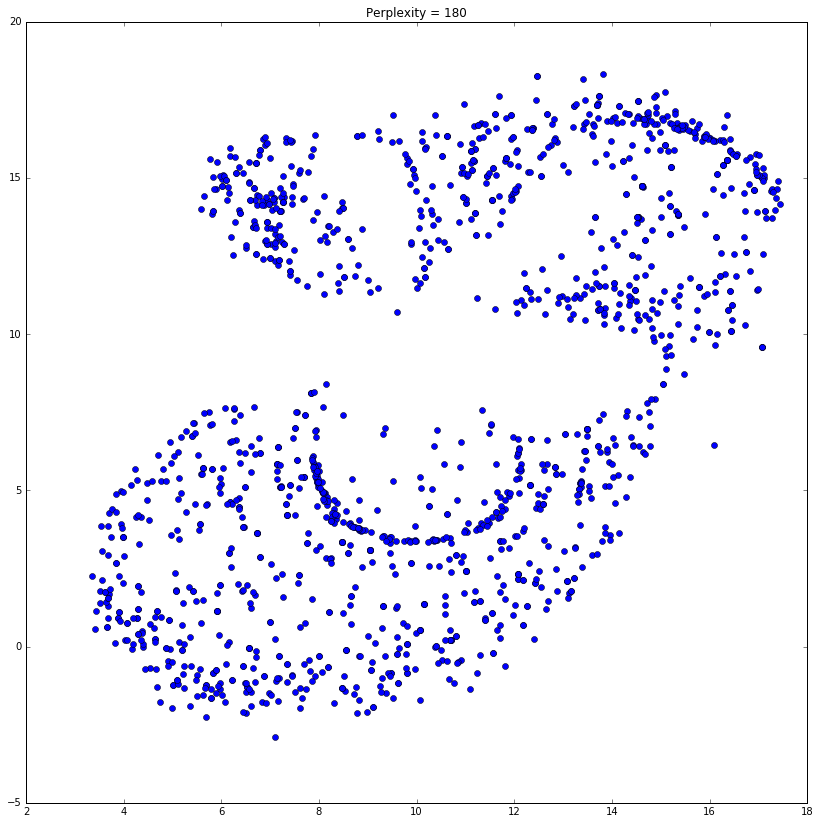

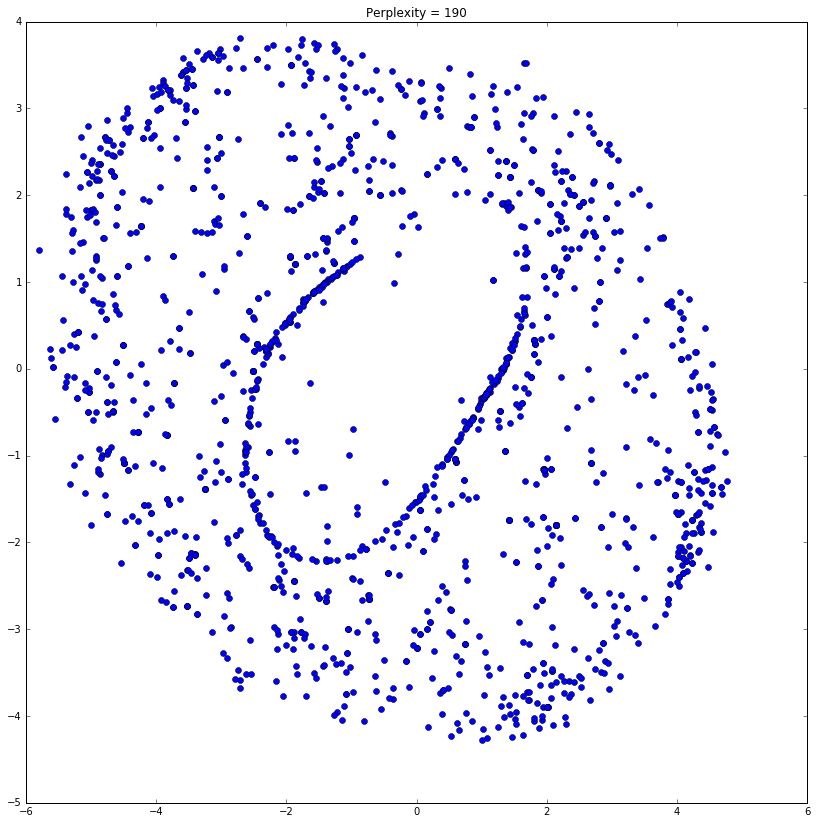

In [267]:
for perp in np.arange(10, 200, 10):
    print(perp)
    tsne = TSNE(2, metric="cosine", perplexity=perp)
    coords = tsne.fit_transform(ns)

    fig = plt.figure(figsize=[14, 14])

    plt.plot(coords[:, 0], coords[:, 1], "bo")
    
    # for r, (x, y) in zip(reactions, coords):
    #     plt.text(x+0.01, y-0.01, r.id)
    plt.title("Perplexity = " + str(perp))
    plt.savefig("../Plots/Reaction_t-SNE/perplexity_" + str(perp) + ".pdf")
    


In [66]:
m_degrees = {m.id: len(m.reactions) for m in model.metabolites}

In [82]:
for k in sorted(m_degrees, key=lambda x: m_degrees[x], reverse=True):
    print(k, m_degrees[k])

h_c 35
h2o_c 18
h_e 17
atp_c 13
adp_c 12
nad_c 12
nadh_c 12
pi_c 12
pyr_c 11
coa_c 9
co2_c 9
nadph_c 9
nadp_c 9
pep_c 8
f6p_c 7
g3p_c 7
accoa_c 7
succ_c 6
mal__L_c 6
akg_c 6
glu__L_c 6
oaa_c 5
gln__L_c 5
q8h2_c 4
g6p_c 4
fum_c 4
q8_c 4
nh4_c 4
for_e 3
ru5p__D_c 3
xu5p__D_c 3
acald_c 3
e4p_c 3
icit_c 3
fdp_c 3
3pg_c 3
for_c 3
succ_e 3
r5p_c 3
pyr_e 2
o2_e 2
6pgc_c 2
h2o_e 2
lac__D_c 2
s7p_c 2
glx_c 2
cit_c 2
akg_e 2
dhap_c 2
co2_e 2
actp_c 2
etoh_c 2
pi_e 2
acon_C_c 2
acald_e 2
ac_e 2
succoa_c 2
mal__L_e 2
2pg_c 2
6pgl_c 2
gln__L_e 2
fru_e 2
etoh_e 2
fum_e 2
amp_c 2
13dpg_c 2
nh4_e 2
ac_c 2
lac__D_e 2
glu__L_e 2
glc__D_e 2
o2_c 2


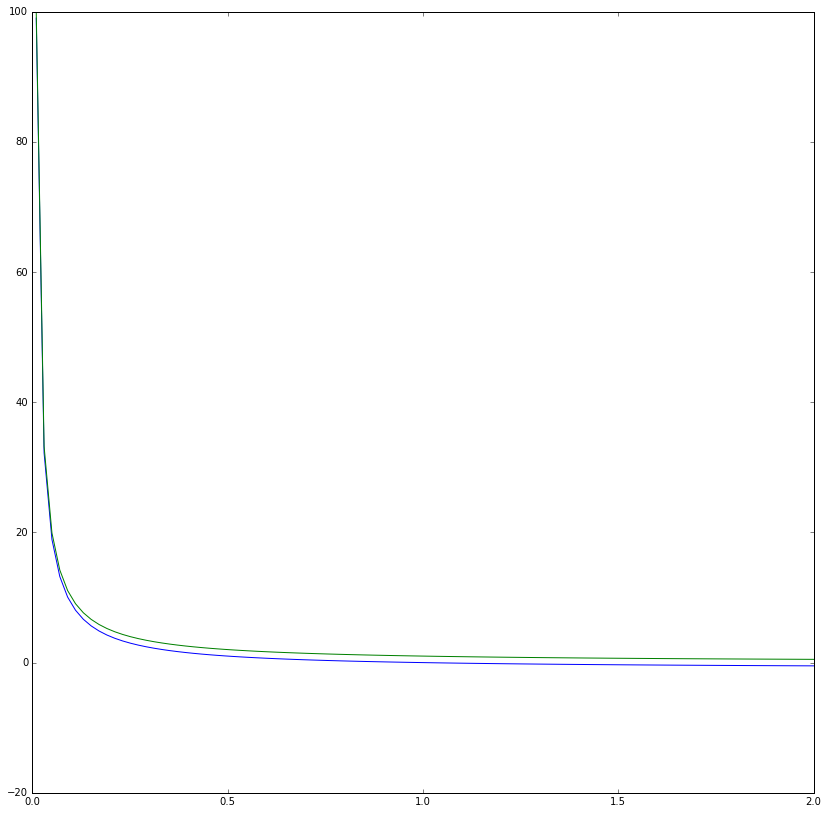

In [116]:
plt.figure(figsize=[14, 14])
x = np.linspace(0.01, 2, num=100)
plt.plot(x, (1-x)/x)
plt.plot(x, 1/x)

In [118]:
a = 2
(1-a)/a

-0.5